<h2> Import important libraries </h2>

<h2> Numpy </h2>
<p> NumPy is a Python library used for numerical computing, providing support for arrays, matrices, and a wide range of mathematical functions to operate on these data structures.</p>
<h2> Pandas </h2>
<p> Pandas is a Python library used for data manipulation and analysis, providing data structures like DataFrame and Series to handle and analyze structured data efficiently.</p>
<h2> Matplotlib </h2>
<p> Matplotlib is a Python library used for creating static, interactive, and animated visualizations in the form of plots and graphs.</p> 

<h2> Seaborn </h2>
<p> Seaborn is a Python library built on Matplotlib used for making statistical data visualization easier and more attractive.</p>

<h2> Sklearn </h2>
<p>Scikit-learn (sklearn) is a Python library used for machine learning tasks such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.</p>

<h2> nltk </h2>
<p> NLTK (Natural Language Toolkit) is a Python library used for working with human language data (natural language processing).</p>

<h2> String </h2>
<p> The string library in Python provides a collection of string operations and constants, such as common string patterns and templates, useful for various text processing tasks.</p>

<h2> wordcloud </h2>
<p> The wordcloud library in Python is used to generate word clouds, which are visual representations of text data where the size of each word indicates its frequency or importance.</p>

<h2> xgboost </h2>
<p> The xgboost library in Python is used for implementing optimized gradient boosting algorithms, often used for classification and regression tasks due to its high performance and efficiency.</p>

 <h2>joblib </h2>
 <p>The joblib library in Python is used for efficient serialization and deserialization of Python objects, and for parallel computing, particularly in machine learning workflows. </p>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split
import nltk 
from sklearn.preprocessing import LabelEncoder
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import joblib
from sklearn.metrics import precision_score

### Following warning library helps to remove the warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Step 1
<h2> Collect Data Set </h2>

data collect from data source 
1. kaggle
2. uci machine learning repository
3. Some Email are putt from my email box

### Import the data set 

In [4]:
df=pd.read_csv("Email data.csv",encoding='latin-1')

I encountered a UTF-8 error while opening my dataset, so I used encoding='latin-1' to handle non-UTF-8 encoded characters, which allowed me to access and process the data correctly.

In [5]:
df.head()

,output,Email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Remove the usless columns

In [6]:
df.drop(columns={"Unnamed: 2","Unnamed: 3","Unnamed: 4"},inplace=True)

In [7]:
df.head()

,output,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Ask Some basic question so that we can understand our data very well 

In [8]:
df.shape

(5572, 2)

In [9]:
df.isnull().sum()

output    0
Email     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   object
 1   Email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Step 2
### Data cleaning and EDA

In [11]:
df.duplicated().sum()

403

### First we remove the duplicated value

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

### Machine learning model do not work with character or strings so that we need convert it into number form

In [14]:
encoder = LabelEncoder()

In [15]:
df['output'] = encoder.fit_transform(df['output'])

In [16]:
df.sample(5)

,output,Email
1110,0,Ok ill tell the company
2160,0,No. Its not specialisation. Can work but its s...
4561,0,How much u trying to get?
4602,0,And I don't plan on staying the night but I pr...
1057,0,Ard 515 like dat. Y?


### EDA

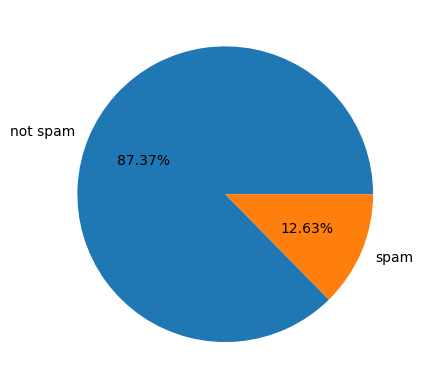

In [17]:
plt.pie(df['output'].value_counts(),labels=['not spam','spam'],autopct="%0.2f%%");

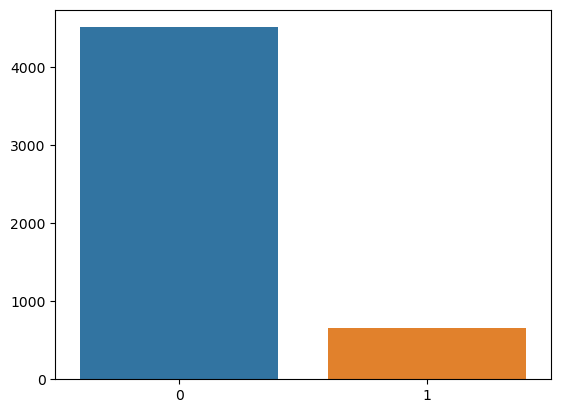

In [18]:
sns.barplot(x=df['output'].value_counts().index,y=df['output'].value_counts().values);

#### The pie chart and bar chart clearlly show us that data is implanced 

### Create a new columuns like num_characters, num_words and num_sentence in email

In [19]:
df['num_characters'] = df['Email'].apply(len)

In [20]:
df.head()

,output,Email,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['Email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,output,Email,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['Email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,output,Email,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df[df['output'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
df[df['output'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


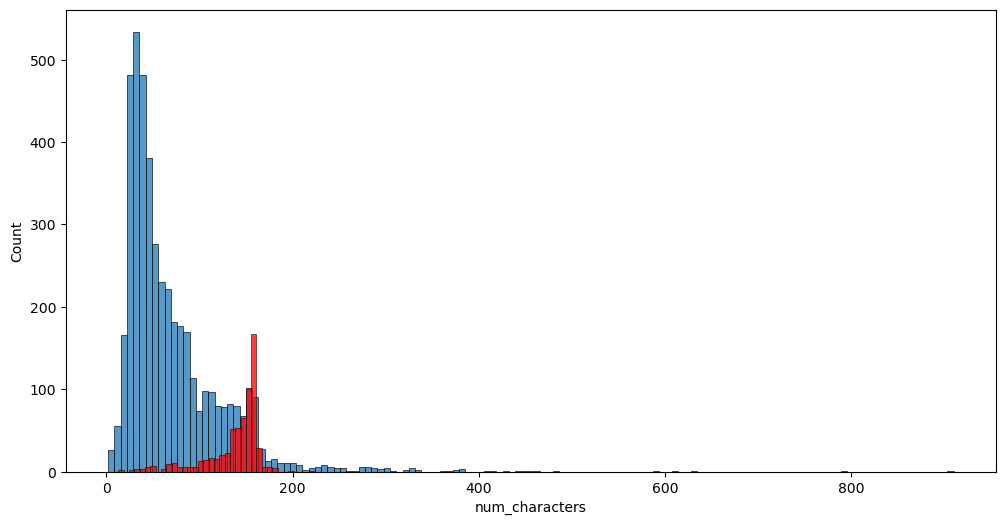

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['output'] == 0]['num_characters'])
sns.histplot(df[df['output'] == 1]['num_characters'],color='red')
plt.show()

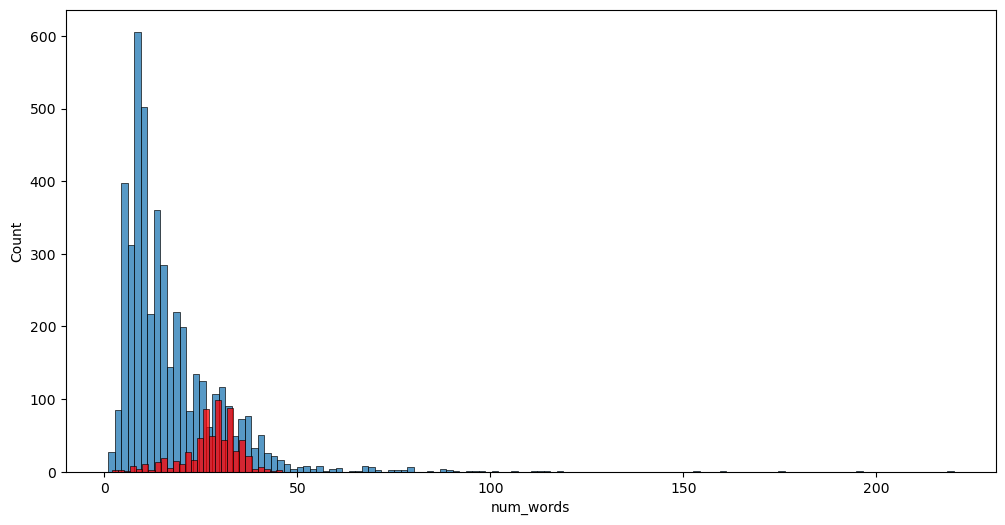

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['output'] == 0]['num_words'])
sns.histplot(df[df['output'] == 1]['num_words'],color='red')
plt.show()

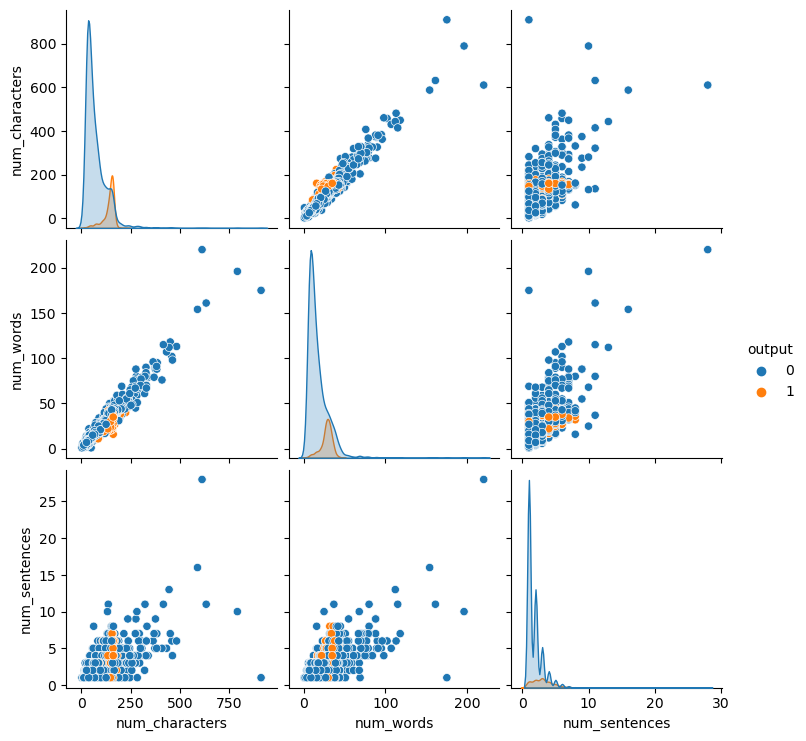

In [30]:
sns.pairplot(df,hue='output');

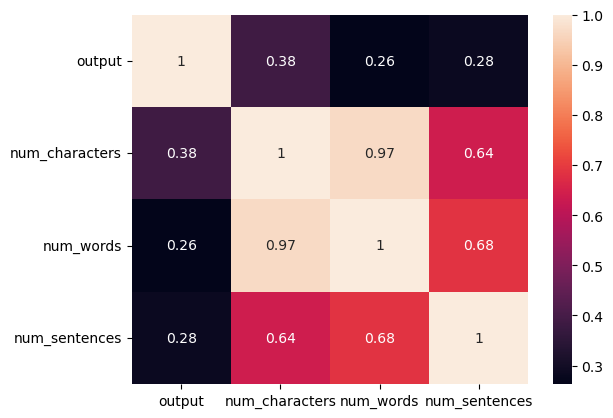

In [31]:
sns.heatmap(df.corr(),annot=True);

# Step 3
### Data Pre-processing 

- Lower case ,Tokenization,Removing special characters, Removing stop words and punctuation,Stemming

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [33]:
ps = PorterStemmer()

In [34]:
df['transformed_text'] = df['Email'].apply(transform_text)

In [35]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
spam_wc = wc.generate(df[df['output'] == 1]['transformed_text'].str.cat(sep=" "))

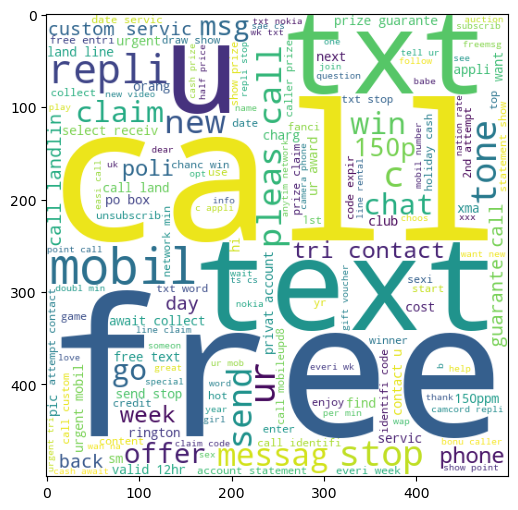

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc);

In [38]:
ham_wc = wc.generate(df[df['output'] == 0]['transformed_text'].str.cat(sep=" "))

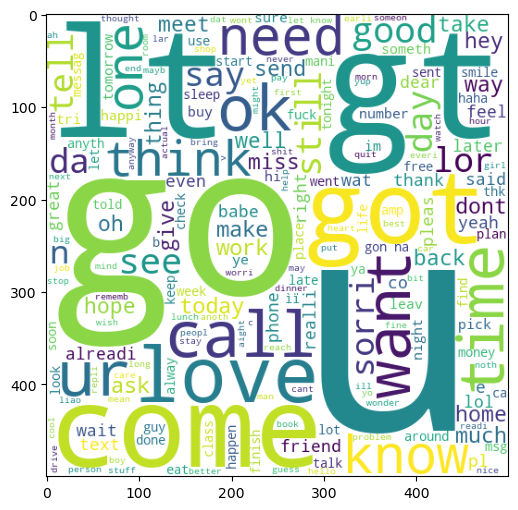

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc);

In [40]:
spam_corpus = []
for msg in df[df['output'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

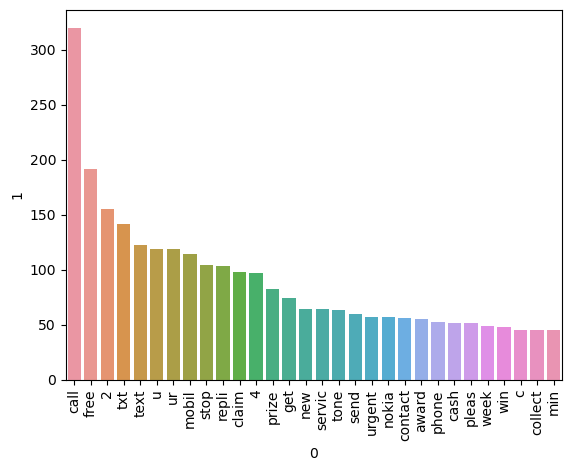

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['output'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35394

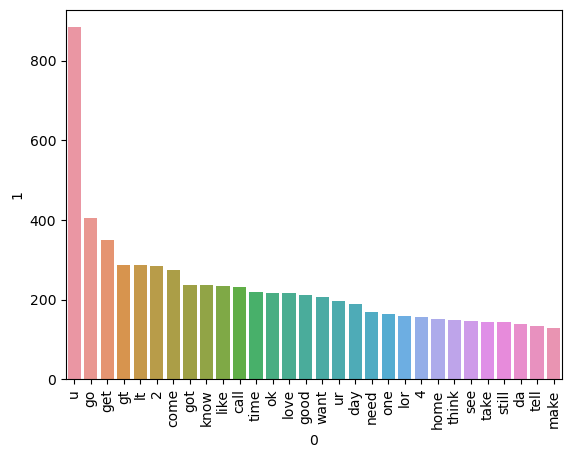

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Step 4
### Feature Selection and model building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5169, 3000)

In [49]:
y = df['output'].values

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[1202  158]
 [  40  151]]
0.4886731391585761


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9716312056737588
[[1360    0]
 [  44  147]]
1.0


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9819471308833011
[[1358    2]
 [  26  165]]
0.9880239520958084


### Import the different Machine learning algorithms 

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Create an object for the model

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, conf_matrix

In [60]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408,
 0.975,
 array([[1356,    4],
        [  35,  156]], dtype=int64))

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vectorizer = TfidfVectorizer()

In [63]:
accuracy_scores = []
precision_scores = []
conf_matrices = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_conf_matrix = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    print(f"Confusion Matrix:\n{current_conf_matrix}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    conf_matrices.append(current_conf_matrix)

For SVC
Accuracy - 0.9748549323017408
Precision - 0.975
Confusion Matrix:
[[1356    4]
 [  35  156]]
For KN
Accuracy - 0.9090909090909091
Precision - 1.0
Confusion Matrix:
[[1360    0]
 [ 141   50]]
For NB
Accuracy - 0.9716312056737588
Precision - 1.0
Confusion Matrix:
[[1360    0]
 [  44  147]]
For DT
Accuracy - 0.9361702127659575
Precision - 0.8194444444444444
Confusion Matrix:
[[1334   26]
 [  73  118]]
For LR
Accuracy - 0.9522888459058672
Precision - 0.9333333333333333
Confusion Matrix:
[[1351    9]
 [  65  126]]
For RF
Accuracy - 0.9729206963249516
Precision - 0.9806451612903225
Confusion Matrix:
[[1357    3]
 [  39  152]]
For AdaBoost
Accuracy - 0.9587362991618311
Precision - 0.9150326797385621
Confusion Matrix:
[[1347   13]
 [  51  140]]
For BgC
Accuracy - 0.9600257898130239
Precision - 0.864406779661017
Confusion Matrix:
[[1336   24]
 [  38  153]]
For ETC
Accuracy - 0.9774339136041263
Precision - 0.9642857142857143
Confusion Matrix:
[[1354    6]
 [  29  162]]
For GBDT
Accuracy 

In [64]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [65]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
2,NB,0.971631,1.000000
5,RF,0.972921,0.980645
0,SVC,0.974855,0.975000
8,ETC,0.977434,0.964286
9,GBDT,0.952289,0.939850
4,LR,0.952289,0.933333
10,xgb,0.963894,0.924528
6,AdaBoost,0.958736,0.915033
7,BgC,0.960026,0.864407


In [66]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [67]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.909091
1,NB,Accuracy,0.971631
2,RF,Accuracy,0.972921
3,SVC,Accuracy,0.974855
4,ETC,Accuracy,0.977434
5,GBDT,Accuracy,0.952289
6,LR,Accuracy,0.952289
7,xgb,Accuracy,0.963894
8,AdaBoost,Accuracy,0.958736
9,BgC,Accuracy,0.960026


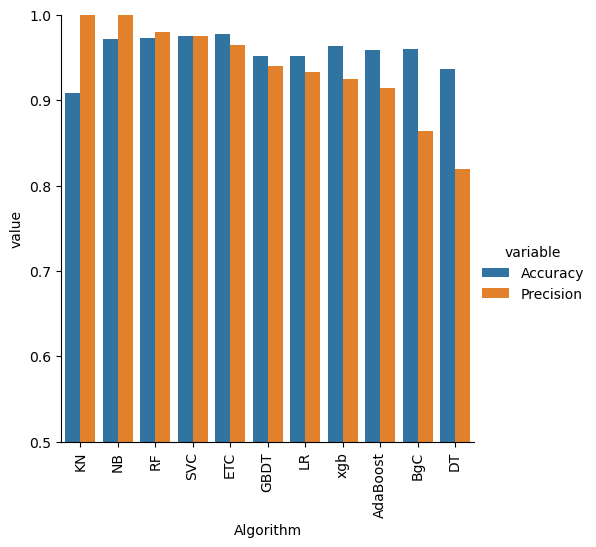

In [68]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [69]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [70]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [71]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [72]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [73]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [74]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.909091,1.000000,0.909091,1.000000,0.909091,1.000000,0.909091,1.000000
1,NB,0.971631,1.000000,0.971631,1.000000,0.971631,1.000000,0.971631,1.000000
2,RF,0.972921,0.980645,0.972921,0.980645,0.972921,0.980645,0.972921,0.980645
3,SVC,0.974855,0.975000,0.974855,0.975000,0.974855,0.975000,0.974855,0.975000
4,ETC,0.977434,0.964286,0.977434,0.964286,0.977434,0.964286,0.977434,0.964286
5,GBDT,0.952289,0.939850,0.952289,0.939850,0.952289,0.939850,0.952289,0.939850
6,LR,0.952289,0.933333,0.952289,0.933333,0.952289,0.933333,0.952289,0.933333
7,xgb,0.963894,0.924528,0.963894,0.924528,0.963894,0.924528,0.963894,0.924528
8,AdaBoost,0.958736,0.915033,0.958736,0.915033,0.958736,0.915033,0.958736,0.915033
9,BgC,0.960026,0.864407,0.960026,0.864407,0.960026,0.864407,0.960026,0.864407


In [75]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [76]:
# Voting Classifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
print("Voting Classifier Accuracy", accuracy_score(y_test, y_pred))
print("Voting Classifier Precision", precision_score(y_test, y_pred))

Voting Classifier Accuracy 0.9825918762088974
Voting Classifier Precision 0.9939759036144579


In [77]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [78]:
from sklearn.ensemble import StackingClassifier

In [79]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [80]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9813023855577047
Precision 0.95


In [81]:
# Save the trained model and TF-IDF vectorizer
joblib.dump(voting, 'spam_classifier_voting.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## Predction of New Email

In [82]:
import joblib
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

In [83]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
# Initialize the Porter Stemmer
ps = PorterStemmer()

In [85]:
# Define the text transformation function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [86]:
# Load the trained model and TF-IDF vectorizer
model = joblib.load('spam_classifier_voting.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

In [88]:
# Example input
input_sms = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

# 1. Preprocess
transformed_sms = transform_text(input_sms)

# 2. Vectorize
vector_input = tfidf.transform([transformed_sms]).toarray()

# 3. Predict
result = model.predict(vector_input)[0]

print("Prediction:", "Spam" if result else "Not Spam")

Prediction: Spam


In [89]:
# Example input
input_sms = "I like Machine learning because it is conceptual and entertaining subject"

# 1. Preprocess
transformed_sms = transform_text(input_sms)

# 2. Vectorize
vector_input = tfidf.transform([transformed_sms]).toarray()

# 3. Predict
result = model.predict(vector_input)[0]

print("Prediction:", "Spam" if result else "Not Spam")

Prediction: Not Spam
